In [1]:
import pandas as pd
from pathlib import Path
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np

In [2]:
amazon_data_csv = Path("Resources/amazon_prime_titles.csv")

In [3]:
data_df = pd.read_csv(amazon_data_csv)
data_df.head()

,id,title,type,release_year,age_certification,runtime,production_countries,seasons,imdb_id,imdb_score,...,tmdb_score,genres1,genres2,genres3,genres4,genres5,genres6,genres7,genres8,genres9
0,tm87233,It's a Wonderful Life,MOVIE,1946,PG,130,['US'],NaN,tt0038650,8.6,...,8.261,'drama','family','fantasy','romance','comedy',NaN,NaN,NaN,NaN
1,tm143047,Duck Soup,MOVIE,1933,NaN,69,['US'],NaN,tt0023969,7.8,...,7.357,'comedy','war',NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tm83884,His Girl Friday,MOVIE,1940,NaN,92,['US'],NaN,tt0032599,7.8,...,7.433,'drama','romance','comedy',NaN,NaN,NaN,NaN,NaN,NaN
3,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,['US'],26.0,tt0850645,8.5,...,7.600,'comedy','family',NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tm5012,Red River,MOVIE,1948,NaN,133,['US'],NaN,tt0040724,7.8,...,7.400,'western','drama','romance','action',NaN,NaN,NaN,NaN,NaN


In [4]:
amazon_df = data_df[["title", "type", "release_year", "age_certification", "production_countries", "imdb_score", "imdb_votes", "genres1", "genres2", "genres3", "genres4", "genres5", "genres6", "genres7", "genres8", "genres9"]]
amazon_df.head()

,title,type,release_year,age_certification,production_countries,imdb_score,imdb_votes,genres1,genres2,genres3,genres4,genres5,genres6,genres7,genres8,genres9
0,It's a Wonderful Life,MOVIE,1946,PG,['US'],8.6,467766.0,'drama','family','fantasy','romance','comedy',NaN,NaN,NaN,NaN
1,Duck Soup,MOVIE,1933,NaN,['US'],7.8,60933.0,'comedy','war',NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,His Girl Friday,MOVIE,1940,NaN,['US'],7.8,60244.0,'drama','romance','comedy',NaN,NaN,NaN,NaN,NaN,NaN
3,The Three Stooges,SHOW,1934,TV-PG,['US'],8.5,1149.0,'comedy','family',NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Red River,MOVIE,1948,NaN,['US'],7.8,32210.0,'western','drama','romance','action',NaN,NaN,NaN,NaN,NaN


In [5]:
len(amazon_df)

10873

In [6]:
reduced_amazon_df = amazon_df.loc[amazon_df.production_countries.str.contains("US")]
reduced_amazon_df.head()

,title,type,release_year,age_certification,production_countries,imdb_score,imdb_votes,genres1,genres2,genres3,genres4,genres5,genres6,genres7,genres8,genres9
0,It's a Wonderful Life,MOVIE,1946,PG,['US'],8.6,467766.0,'drama','family','fantasy','romance','comedy',NaN,NaN,NaN,NaN
1,Duck Soup,MOVIE,1933,NaN,['US'],7.8,60933.0,'comedy','war',NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,His Girl Friday,MOVIE,1940,NaN,['US'],7.8,60244.0,'drama','romance','comedy',NaN,NaN,NaN,NaN,NaN,NaN
3,The Three Stooges,SHOW,1934,TV-PG,['US'],8.5,1149.0,'comedy','family',NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Red River,MOVIE,1948,NaN,['US'],7.8,32210.0,'western','drama','romance','action',NaN,NaN,NaN,NaN,NaN


In [7]:
len(reduced_amazon_df)

6027

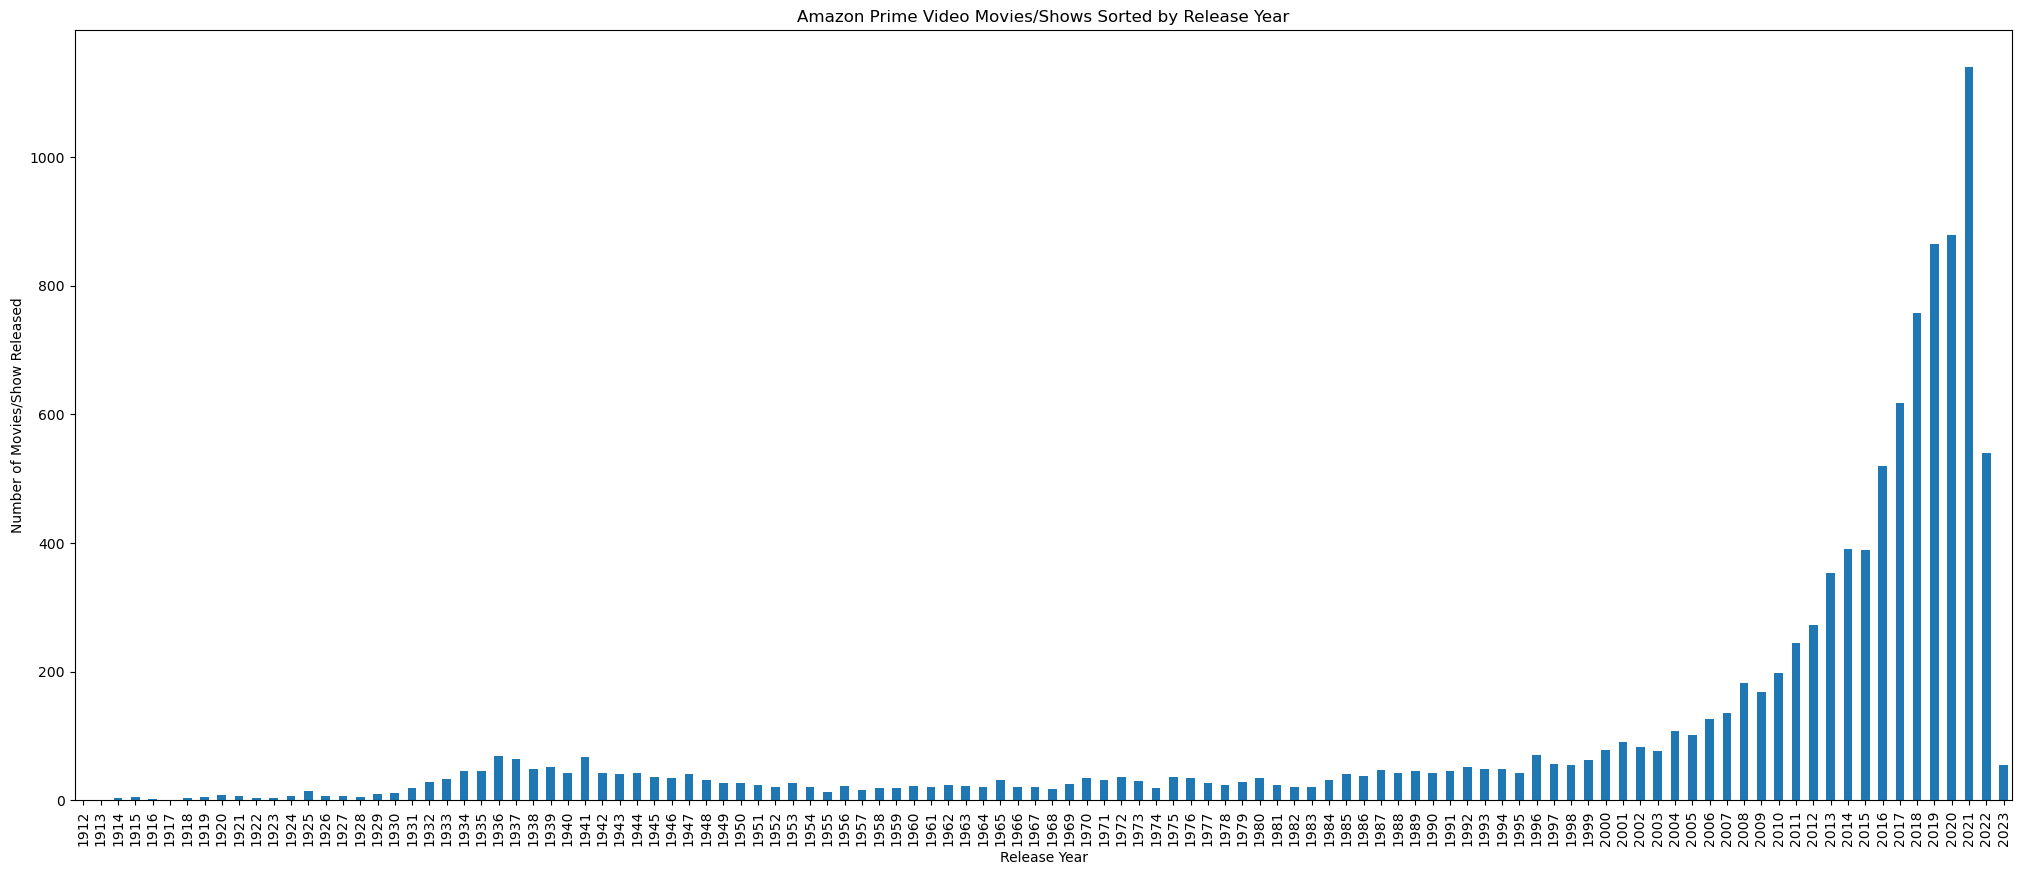

In [8]:
release_year_df = amazon_df.groupby('release_year')

release_year_count = release_year_df['release_year'].count()

release_chart = release_year_count.plot(kind="bar", title="Amazon Prime Video Movies/Shows Sorted by Release Year", figsize=(25,10))
release_chart.set_xlabel("Release Year")
release_chart.set_ylabel("Number of Movies/Show Released")
plt.savefig("Images/Amazon_by_Release_Year.png")
plt.show()


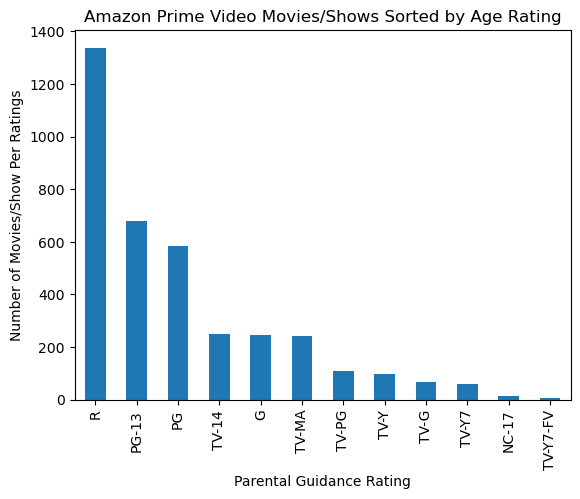

In [9]:
# Split up our data into groups based upon 'Patron Type Definition'
age_rating_df = amazon_df.groupby('age_certification')

# Find out how many of each patron type borrowed library items
age_rating_count = age_rating_df['age_certification'].count()

# Chart our data, give it a title, and label the axes
sorted_age_rating = age_rating_count.sort_values(ascending=False)
age_rating_chart = sorted_age_rating.plot(kind="bar", title="Amazon Prime Video Movies/Shows Sorted by Age Rating")
age_rating_chart.set_xlabel("Parental Guidance Rating")
age_rating_chart.set_ylabel("Number of Movies/Show Per Ratings")
plt.savefig("Images/Amazon_by_Age_Rating.png")
plt.show()


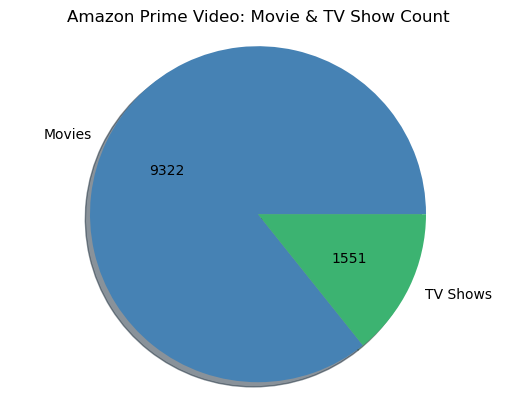

In [10]:
type_df = amazon_df.groupby('type')
labels = ["Movies", "TV Shows"]
type_count = type_df['type'].count()
colors = ["steelblue", "mediumseagreen"]
plt.pie(type_count, labels=labels, colors=colors, autopct= lambda x: '{:.0f}'.format(x*type_count.sum()/100), shadow=True)
plt.axis("equal")
plt.title("Amazon Prime Video: Movie & TV Show Count")
plt.savefig("Images/Amazon_movie_show_coun.png")
plt.show()

In [11]:
genres_df = amazon_df[["genres1", "genres2", "genres3", "genres4", "genres5", "genres6", "genres7", "genres8", "genres9"]]
genres_df = genres_df.fillna('')
genres_df.head()

,genres1,genres2,genres3,genres4,genres5,genres6,genres7,genres8,genres9
0,'drama','family','fantasy','romance','comedy',,,,
1,'comedy','war',,,,,,,
2,'drama','romance','comedy',,,,,,
3,'comedy','family',,,,,,,
4,'western','drama','romance','action',,,,,


In [12]:
new_genres_df = genres_df.stack().reset_index()
new_genres_df.columns = ["movie_number", "column", "genre"]
new_genres_df["genre"] = new_genres_df["genre"].str.strip()
sorted_df = new_genres_df.loc[(new_genres_df["genre"] != "")]
new_sorted_df = sorted_df.groupby('genre')


In [13]:
new_genres_df['genre'].unique()

array(["'drama'", "'family'", "'fantasy'", "'romance'", "'comedy'", '',
       "'war'", "'western'", "'action'", "'european'", "'animation'",
       "'scifi'", "'horror'", "'thriller'", "'crime'", "'sport'",
       "'history'", "'music'", "'documentation'", "'reality'"],
      dtype=object)

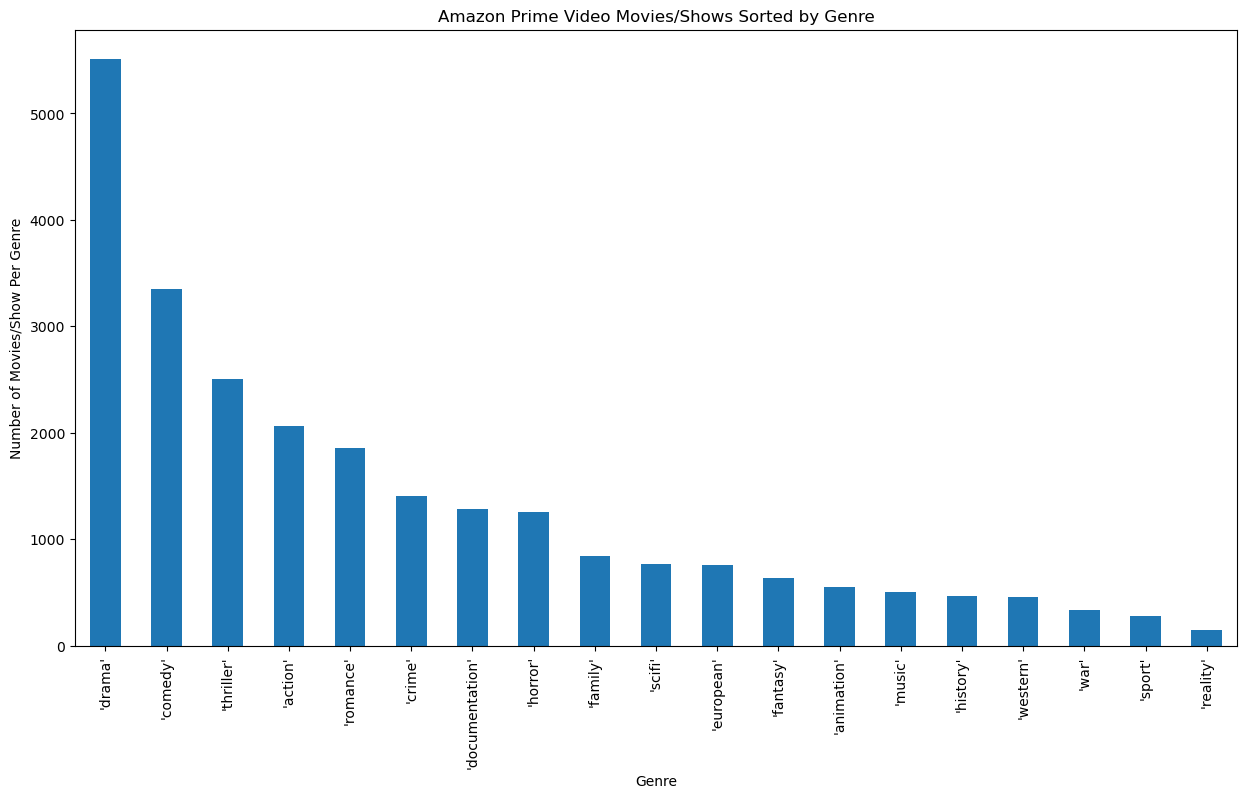

In [14]:
genre_count = new_sorted_df['genre'].count()
sorted_genre = genre_count.sort_values(ascending=False)
genre_chart = sorted_genre.plot(kind="bar", title="Amazon Prime Video Movies/Shows Sorted by Genre", figsize=(15,8))
genre_chart.set_xlabel("Genre")
genre_chart.set_ylabel("Number of Movies/Show Per Genre")
plt.savefig("Images/Amazon_by_genre.png")
plt.show()

In [15]:
imdb_score_mean = amazon_df["imdb_score"].mean()
imdb_score_mean

5.970558115719407

In [16]:
imdb_score_top_df = amazon_df[["title", "type", "imdb_score"]]
imdb_score_top_df = imdb_score_top_df.sort_values(by="imdb_score", ascending=False)
imdb_score_top_df.head(10)

,title,type,imdb_score
10161,Pawankhind,MOVIE,9.9
10638,COD (Cash On Delivery),MOVIE,9.8
4593,Romeo & Juliet,MOVIE,9.8
9459,Last Resort,MOVIE,9.7
10131,The 1975 'At Their Very Best' Live from Madiso...,MOVIE,9.7
9030,Water Helps the Blood Run,SHOW,9.7
10723,Chhote Ustaad-Precaution Is Better Than Cure,MOVIE,9.6
7569,Suffer for Good,MOVIE,9.6
10744,Life After,SHOW,9.5
6001,Denis,SHOW,9.4


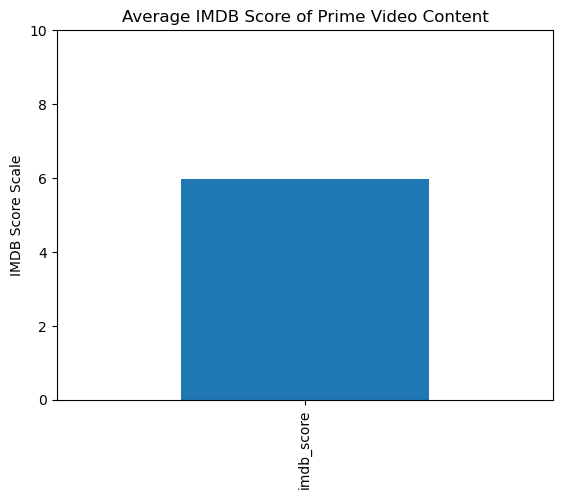

In [17]:
imdb_score_df = amazon_df[["imdb_score"]]
score_chart = imdb_score_df.mean().plot(kind='bar', title="Average IMDB Score of Prime Video Content")
score_chart.set_ylabel("IMDB Score Scale")
score_chart.set_ylim(0,10)
plt.savefig("Images/Amazon_by_IMDB_Score.png")
plt.show()

In [18]:
imdb_votes_mean = amazon_df["imdb_votes"].mean()
imdb_votes_mean

8973.231723572235

In [19]:
imdb_votes_top_df = amazon_df[["title", "type", "imdb_votes"]]
imdb_votes_top_df = imdb_votes_top_df.sort_values(by="imdb_votes", ascending=False)
imdb_votes_top_df.head(10)

,title,type,imdb_votes
2024,Pulp Fiction,MOVIE,2081757.0
4369,The Wolf of Wall Street,MOVIE,1437804.0
2584,Eternal Sunshine of the Spotless Mind,MOVIE,1020305.0
2023,Good Will Hunting,MOVIE,987571.0
1670,Raiders of the Lost Ark,MOVIE,976566.0
934,12 Angry Men,MOVIE,801057.0
1672,Indiana Jones and the Last Crusade,MOVIE,763526.0
2585,Shrek,MOVIE,690470.0
2605,The King's Speech,MOVIE,686908.0
2604,The Curious Case of Benjamin Button,MOVIE,660943.0


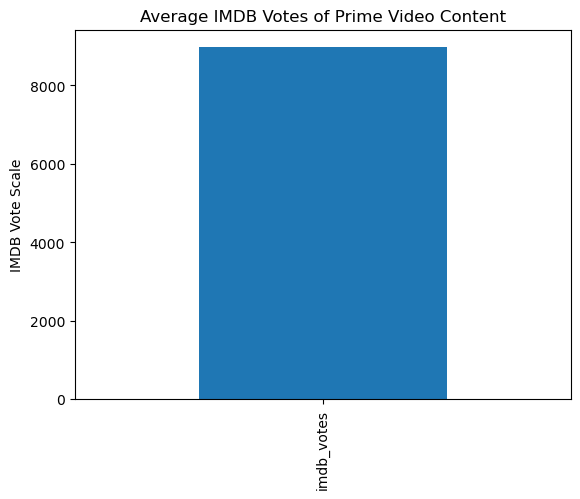

In [20]:
imdb_votes_df = amazon_df[["imdb_votes"]]
vote_chart = imdb_votes_df.mean().plot(kind='bar', title="Average IMDB Votes of Prime Video Content")
vote_chart.set_ylabel("IMDB Vote Scale")
plt.savefig("Images/Amazon_by_IMDB_Votes.png")
plt.show()
